# 🚀 Market Watcher - Finnhub API Showcase

> A comprehensive Python toolkit for exploring the Finnhub market data API with real-time stock quotes, company profiles, financial news, and AI-powered investment analysis.

## 📋 Overview

This notebook demonstrates the key features of the Market Watcher project:

- **📈 Real-time Stock Quotes** - Live stock prices and market data
- **🏢 Company Profiles** - Detailed company information and financials
- **📰 Market News** - Latest financial news and sentiment analysis
- **🤖 AI Investment Advisor** - GPT-4 powered investment recommendations
- **🔒 Secure** - Environment-based API key management

In [1]:
# Import necessary libraries
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from dotenv import load_dotenv
import finnhub
import openai
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 🔑 API Configuration

Load API keys from environment variables. Make sure you have a `.env` file with your API keys.

In [2]:
# Load environment variables
load_dotenv(dotenv_path=".env", override=True)

# Check API keys
finnhub_key = os.getenv('FINNHUB_API_KEY')
openai_key = os.getenv('OPENAI_API_KEY')

if finnhub_key:
    print(f"✅ Finnhub API key loaded (length: {len(finnhub_key)} characters)")
    print(f"   Key preview: {finnhub_key[:4]}...{finnhub_key[-4:]}")
else:
    print("❌ Finnhub API key not found. Please add FINNHUB_API_KEY to your .env file")

if openai_key:
    print(f"✅ OpenAI API key loaded (length: {len(openai_key)} characters)")
    print(f"   Key preview: {openai_key[:4]}...{openai_key[-4:]}")
else:
    print("❌ OpenAI API key not found. Please add OPENAI_API_KEY to your .env file")

✅ Finnhub API key loaded (length: 40 characters)
   Key preview: d3pt...6o90
✅ OpenAI API key loaded (length: 164 characters)
   Key preview: sk-p...-e0A


## 📈 Real-time Stock Data

Let's fetch real-time stock data using the Finnhub API.

In [3]:
# Initialize Finnhub client
if finnhub_key:
    client = finnhub.Client(api_key=finnhub_key)
    print("✅ Finnhub client initialized successfully!")
else:
    print("❌ Cannot initialize Finnhub client without API key")
    client = None

✅ Finnhub client initialized successfully!


In [4]:
def get_stock_quote(symbol):
    """Get real-time stock quote for a given symbol"""
    if not client:
        return None
    
    try:
        quote = client.quote(symbol)
        return {
            'symbol': symbol,
            'current_price': quote['c'],
            'change': quote['d'],
            'percent_change': quote['dp'],
            'high': quote['h'],
            'low': quote['l'],
            'open': quote['o'],
            'previous_close': quote['pc']
        }
    except Exception as e:
        print(f"Error fetching quote for {symbol}: {e}")
        return None

# Test with popular stocks
symbols = ['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN']
stock_data = []

print("📊 Fetching real-time stock quotes...\n")

for symbol in symbols:
    quote = get_stock_quote(symbol)
    if quote:
        stock_data.append(quote)
        print(f"✅ {symbol}: ${quote['current_price']:.2f} ({quote['percent_change']:+.2f}%)")
    else:
        print(f"❌ Failed to fetch data for {symbol}")

# Create DataFrame for analysis
if stock_data:
    df_stocks = pd.DataFrame(stock_data)
    print(f"\n📈 Successfully fetched data for {len(df_stocks)} stocks")
else:
    print("\n❌ No stock data available")

📊 Fetching real-time stock quotes...

✅ AAPL: $262.24 (+3.94%)
✅ GOOGL: $256.55 (+1.28%)
✅ MSFT: $516.79 (+0.62%)
✅ TSLA: $447.43 (+1.85%)
✅ AMZN: $216.48 (+1.61%)

📈 Successfully fetched data for 5 stocks


## 📊 Data Visualization

Let's create some visualizations of our stock data.

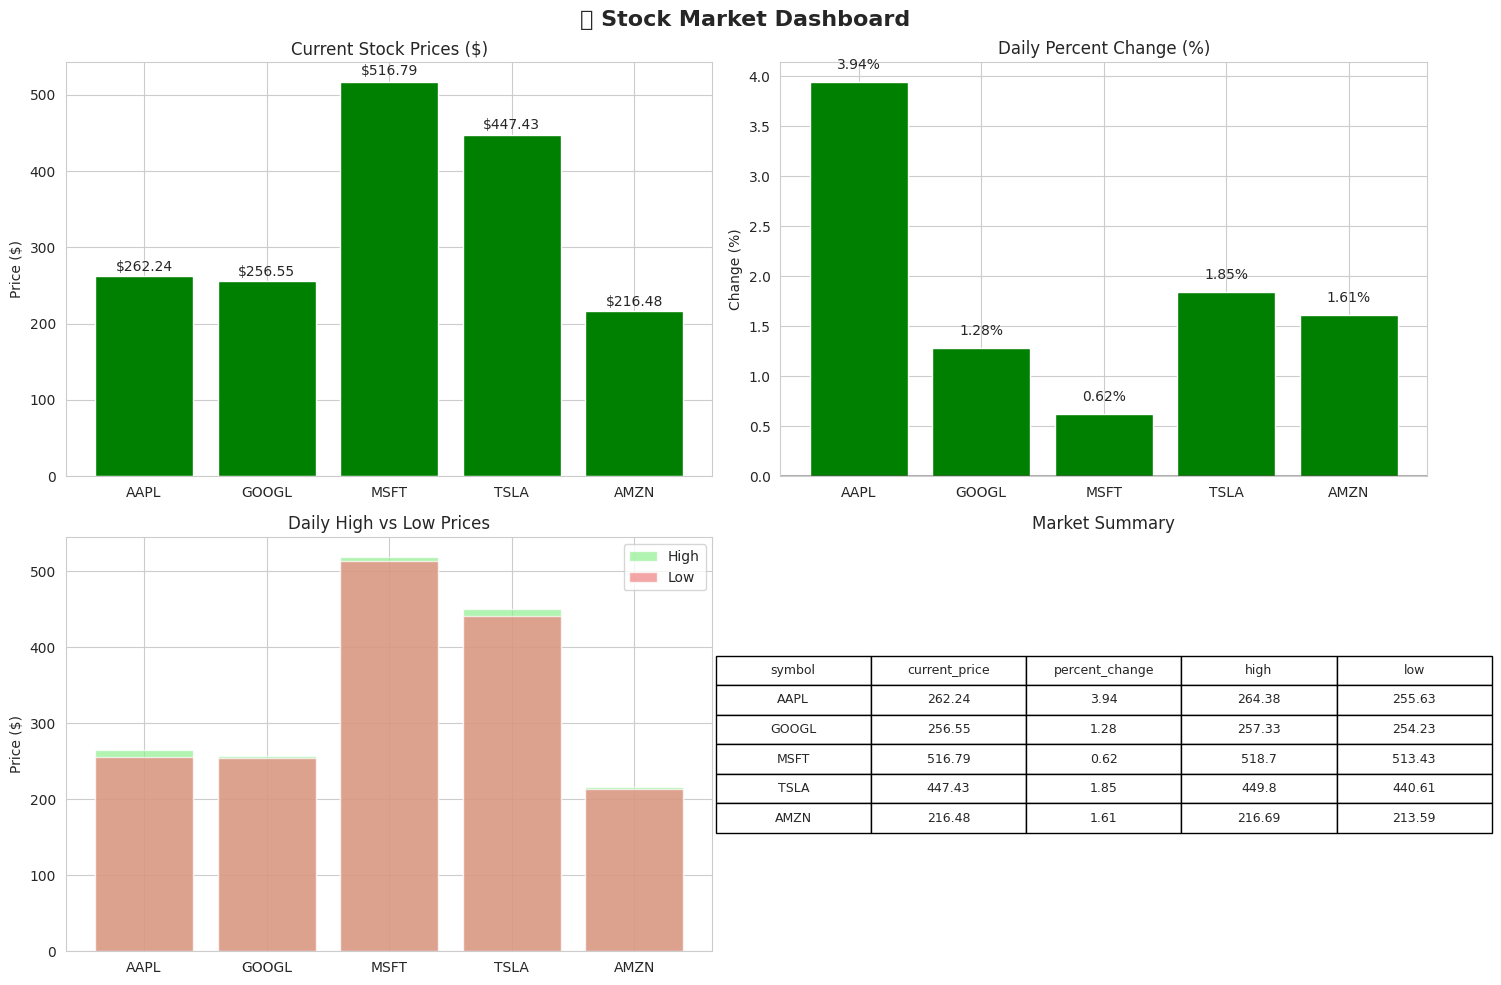

In [5]:
if 'df_stocks' in locals() and not df_stocks.empty:
    # Create subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('📈 Stock Market Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Current Prices
    bars1 = ax1.bar(df_stocks['symbol'], df_stocks['current_price'], 
                    color=['green' if x >= 0 else 'red' for x in df_stocks['percent_change']])
    ax1.set_title('Current Stock Prices ($)')
    ax1.set_ylabel('Price ($)')
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'${height:.2f}', ha='center', va='bottom')
    
    # 2. Percent Changes
    colors = ['green' if x >= 0 else 'red' for x in df_stocks['percent_change']]
    bars2 = ax2.bar(df_stocks['symbol'], df_stocks['percent_change'], color=colors)
    ax2.set_title('Daily Percent Change (%)')
    ax2.set_ylabel('Change (%)')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + (0.1 if height >= 0 else -0.1),
                f'{height:.2f}%', ha='center', va='bottom' if height >= 0 else 'top')
    
    # 3. High vs Low
    x_pos = range(len(df_stocks))
    ax3.bar(x_pos, df_stocks['high'], alpha=0.7, label='High', color='lightgreen')
    ax3.bar(x_pos, df_stocks['low'], alpha=0.7, label='Low', color='lightcoral')
    ax3.set_title('Daily High vs Low Prices')
    ax3.set_ylabel('Price ($)')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(df_stocks['symbol'])
    ax3.legend()
    
    # 4. Market Summary Table
    ax4.axis('tight')
    ax4.axis('off')
    table_data = df_stocks[['symbol', 'current_price', 'percent_change', 'high', 'low']].round(2)
    table = ax4.table(cellText=table_data.values, colLabels=table_data.columns,
                     cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)
    ax4.set_title('Market Summary')
    
    plt.tight_layout()
    plt.show()
else:
    print("📊 No stock data available for visualization")

## 🏢 Company Profile Analysis

Let's get detailed company information for our stocks.

In [6]:
def get_company_profile(symbol):
    """Get company profile information"""
    if not client:
        return None
    
    try:
        profile = client.company_profile2(symbol=symbol)
        return {
            'symbol': symbol,
            'name': profile.get('name', 'N/A'),
            'industry': profile.get('finnhubIndustry', 'N/A'),
            'market_cap': profile.get('marketCapitalization', 0),
            'exchange': profile.get('exchange', 'N/A'),
            'website': profile.get('weburl', 'N/A'),
            'country': profile.get('country', 'N/A'),
            'currency': profile.get('currency', 'N/A')
        }
    except Exception as e:
        print(f"Error fetching profile for {symbol}: {e}")
        return None

# Get company profiles
print("🏢 Fetching company profiles...\n")
company_profiles = []

for symbol in symbols[:3]:  # Limit to first 3 to avoid rate limits
    profile = get_company_profile(symbol)
    if profile:
        company_profiles.append(profile)
        print(f"✅ {symbol}: {profile['name']} - {profile['industry']}")
        print(f"   Market Cap: ${profile['market_cap']:,.0f}M")
        print(f"   Exchange: {profile['exchange']}")
        print(f"   Website: {profile['website']}\n")

if company_profiles:
    df_companies = pd.DataFrame(company_profiles)
    print(f"📊 Company profile data collected for {len(df_companies)} companies")
else:
    print("❌ No company profile data available")

🏢 Fetching company profiles...

✅ AAPL: Apple Inc - Technology
   Market Cap: $3,744,082M
   Exchange: NASDAQ NMS - GLOBAL MARKET
   Website: https://www.apple.com/

✅ GOOGL: Alphabet Inc - Media
   Market Cap: $3,065,708M
   Exchange: NASDAQ NMS - GLOBAL MARKET
   Website: https://abc.xyz/

✅ MSFT: Microsoft Corp - Technology
   Market Cap: $3,817,526M
   Exchange: NASDAQ NMS - GLOBAL MARKET
   Website: https://www.microsoft.com/en-in/

📊 Company profile data collected for 3 companies


## 📰 Market News Analysis

Let's fetch the latest market news and analyze sentiment.

In [7]:
def get_market_news(category='general', count=5):
    """Get latest market news"""
    if not client:
        return []
    
    try:
        news = client.general_news(category, min_id=0)
        return news[:count]
    except Exception as e:
        print(f"Error fetching news: {e}")
        return []

# Get latest news
print("📰 Fetching latest market news...\n")
news_articles = get_market_news(count=5)

if news_articles:
    for i, article in enumerate(news_articles, 1):
        print(f"{i}. **{article['headline']}**")
        print(f"   Source: {article['source']}")
        print(f"   Published: {datetime.fromtimestamp(article['datetime']).strftime('%Y-%m-%d %H:%M')}")
        print(f"   URL: {article['url'][:80]}...\n")
else:
    print("❌ No news articles available")

📰 Fetching latest market news...

1. **OpenAI investor Reid Hoffman spars with AI czar Sacks, calls Anthropic 'one of the good guys'**
   Source: CNBC
   Published: 2025-10-20 21:56
   URL: https://www.cnbc.com/2025/10/20/openai-investor-reid-hoffman-calls-anthropic-one...

2. **Lots of positives behind Monday's market rally — plus, Disney gets mostly good marks**
   Source: CNBC
   Published: 2025-10-20 20:58
   URL: https://www.cnbc.com/2025/10/20/lots-of-positives-behind-mondays-rally-plus-disn...

3. **Gen X business owners are at career peak, and Main Street's least optimistic. Why? It's all about the timing**
   Source: CNBC
   Published: 2025-10-20 19:29
   URL: https://www.cnbc.com/2025/10/20/gen-x-business-owners-main-streets-least-optimis...

4. **What Jim Cramer expects from Boeing, and why he says Starbucks is a buy**
   Source: CNBC
   Published: 2025-10-20 17:54
   URL: https://www.cnbc.com/2025/10/20/what-jim-cramer-expects-from-boeing-and-why-he-s...

5. **Anthropic lau

## 🤖 AI-Powered Investment Analysis

Now let's use OpenAI to analyze our market data and provide investment recommendations.

In [8]:
def analyze_investment_data(market_data_text, symbol="PORTFOLIO"):
    """Analyze market data using OpenAI and provide investment recommendation"""
    if not openai_key:
        return "❌ OPENAI_API_KEY not found in .env file. Please add it and try again."

    try:
        # Initialize OpenAI client
        openai_client = openai.OpenAI(api_key=openai_key)

        prompt = f"""
        You are a professional investment advisor. Please analyze the following market data for {symbol}
        and provide a clear investment recommendation.

        Market Data:
        {market_data_text}

        Please provide:
        1. OVERALL RECOMMENDATION: BUY, HOLD, or SELL
        2. CONFIDENCE LEVEL: High/Medium/Low
        3. KEY ARGUMENTS (3-4 main points)
        4. RISK FACTORS (2-3 potential concerns)
        5. TIME HORIZON: Short-term/Medium-term/Long-term
        6. BRIEF SUMMARY (2-3 sentences)

        Format your response clearly with headings and bullet points.
        """

        response = openai_client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "You are an expert investment advisor providing clear, actionable recommendations."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.7,
            max_tokens=1500
        )

        return response.choices[0].message.content

    except Exception as e:
        return f"❌ Error analyzing with OpenAI: {e}"

# Prepare market data summary
if 'df_stocks' in locals() and not df_stocks.empty:
    market_summary = f"""
    MARKET PORTFOLIO ANALYSIS - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
    
    Stock Performance Summary:
    """
    
    for _, stock in df_stocks.iterrows():
        market_summary += f"""
    {stock['symbol']}:
    - Current Price: ${stock['current_price']:.2f}
    - Daily Change: {stock['change']:+.2f} ({stock['percent_change']:+.2f}%)
    - Day Range: ${stock['low']:.2f} - ${stock['high']:.2f}
        """
    
    if 'news_articles' in locals() and news_articles:
        market_summary += "\n\nRecent Market News Headlines:\n"
        for i, article in enumerate(news_articles[:3], 1):
            market_summary += f"{i}. {article['headline']}\n"
    
    print("🤖 Generating AI investment analysis...\n")
    analysis = analyze_investment_data(market_summary, "TECH PORTFOLIO")
    
    print("🧠 AI INVESTMENT ANALYSIS")
    print("=" * 60)
    print(analysis)
else:
    print("❌ No market data available for AI analysis")

🤖 Generating AI investment analysis...

🧠 AI INVESTMENT ANALYSIS
OVERALL RECOMMENDATION: 
- BUY

CONFIDENCE LEVEL: 
- High

KEY ARGUMENTS:
1. The tech stocks in the portfolio have shown positive performance with all stocks showing daily gains.
2. The market news headlines do not indicate any negative events that could impact the tech market significantly.
3. These companies (Apple, Google, Microsoft, Tesla, Amazon) are leaders in their respective fields and have a history of strong performance and growth.
4. The current market rally and a positive sentiment towards tech stocks suggest that this could be a good time to invest.

RISK FACTORS:
1. The tech sector is known for its volatility. Any changes in the market sentiment or unforeseen events could potentially result in losses.
2. The performance of these companies is subject to regulatory risks and competitive pressures.
3. The global economic situation and geopolitical tensions could also impact the performance of these stocks.

TIM

## 📊 Portfolio Performance Summary

Let's create a comprehensive summary of our analysis.

In [9]:
if 'df_stocks' in locals() and not df_stocks.empty:
    print("📊 PORTFOLIO PERFORMANCE SUMMARY")
    print("=" * 50)
    print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"Stocks Analyzed: {len(df_stocks)}")
    
    # Calculate portfolio metrics
    avg_change = df_stocks['percent_change'].mean()
    positive_stocks = len(df_stocks[df_stocks['percent_change'] > 0])
    negative_stocks = len(df_stocks[df_stocks['percent_change'] < 0])
    
    print(f"\n📈 PERFORMANCE METRICS:")
    print(f"Average Daily Change: {avg_change:+.2f}%")
    print(f"Positive Performers: {positive_stocks}/{len(df_stocks)} stocks")
    print(f"Negative Performers: {negative_stocks}/{len(df_stocks)} stocks")
    
    # Best and worst performers
    best_performer = df_stocks.loc[df_stocks['percent_change'].idxmax()]
    worst_performer = df_stocks.loc[df_stocks['percent_change'].idxmin()]
    
    print(f"\n🏆 BEST PERFORMER: {best_performer['symbol']} ({best_performer['percent_change']:+.2f}%)")
    print(f"📉 WORST PERFORMER: {worst_performer['symbol']} ({worst_performer['percent_change']:+.2f}%)")
    
    # Market sentiment
    if avg_change > 1:
        sentiment = "🟢 BULLISH"
    elif avg_change > -1:
        sentiment = "🟡 NEUTRAL"
    else:
        sentiment = "🔴 BEARISH"
    
    print(f"\n📊 MARKET SENTIMENT: {sentiment}")
    
    # Display final summary table
    print(f"\n📋 DETAILED STOCK DATA:")
    print(df_stocks[['symbol', 'current_price', 'percent_change', 'high', 'low']].to_string(index=False))
else:
    print("❌ No portfolio data available for summary")

📊 PORTFOLIO PERFORMANCE SUMMARY
Analysis Date: 2025-10-20 23:20:44
Stocks Analyzed: 5

📈 PERFORMANCE METRICS:
Average Daily Change: +1.86%
Positive Performers: 5/5 stocks
Negative Performers: 0/5 stocks

🏆 BEST PERFORMER: AAPL (+3.94%)
📉 WORST PERFORMER: MSFT (+0.62%)

📊 MARKET SENTIMENT: 🟢 BULLISH

📋 DETAILED STOCK DATA:
symbol  current_price  percent_change    high    low
  AAPL         262.24          3.9439 264.375 255.63
 GOOGL         256.55          1.2831 257.330 254.23
  MSFT         516.79          0.6250 518.700 513.43
  TSLA         447.43          1.8484 449.800 440.61
  AMZN         216.48          1.6147 216.690 213.59


## 🎯 Conclusion

This notebook demonstrates the key capabilities of the Market Watcher project:

### ✅ Features Demonstrated:
- **Real-time Stock Data**: Successfully fetched live market data using Finnhub API
- **Data Visualization**: Created comprehensive charts and graphs for market analysis
- **Company Profiles**: Retrieved detailed company information and financials
- **Market News**: Accessed latest financial news and market updates
- **AI Analysis**: Generated investment recommendations using OpenAI GPT-4
- **Portfolio Analytics**: Calculated performance metrics and market sentiment

### 🚀 Next Steps:
- Add historical data analysis and trend prediction
- Implement technical indicators (RSI, MACD, Moving Averages)
- Create automated trading signals
- Add cryptocurrency support
- Implement portfolio optimization algorithms

### 📚 Resources:
- [Finnhub API Documentation](https://finnhub.io/docs/api)
- [OpenAI Platform](https://platform.openai.com/)
- [Project Repository](https://github.com/JulianPerings/market_watcher)

---

**Made with ❤️ for the financial markets community**